<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [GRAD1] - Linear regression with gradient descent
<!-- DESC --> An example of gradient descent in the simple case of a linear regression.
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->


## Objectives :
 - To illustrate the iterative approach of a gradient descent

## What we're going to do :

Equation : $ Y = X.\Theta + N$  
Where N is a noise vector
and $\Theta = (a,b)$ a vector as y = a.x + b

We will calculate a loss function and its gradient.  
We will descend this gradient in order to find a minimum value of our loss function.

$
\triangledown_\theta MSE(\Theta)=\begin{bmatrix}
\frac{\partial}{\partial \theta_0}MSE(\Theta)\\
\frac{\partial}{\partial \theta_1}MSE(\Theta)\\
\vdots\\
\frac{\partial}{\partial \theta_n}MSE(\Theta)
\end{bmatrix}=\frac2m X^T\cdot(X\cdot\Theta-Y)
$  

and :  

$\Theta \leftarrow \Theta - \eta \cdot \triangledown_\theta MSE(\Theta)$

where $\eta$ is the learning rate

## Step 1 - Import


In [1]:
import numpy as np
import sys

from modules.RegressionCooker import RegressionCooker 

sys.path.append('..')
import fidle.pwk as pwk

datasets_dir = pwk.init('GRAD1')


FIDLE 2020 - Practical Work Module
Version              : 0.6.1 DEV
Notebook id          : GRAD1
Run time             : Tuesday 15 December 2020, 15:05:11
TensorFlow version   : 2.0.0
Keras version        : 2.2.4-tf
Datasets dir         : /home/pjluc/datasets/fidle
Update keras cache   : False


## Step 2 - Instanciate

In [2]:
cooker = RegressionCooker()


FIDLE 2020 - Regression Cooker
Version      : 0.1
Run time     : Tuesday 15 December 2020, 15:05:11


## Step 2 - Get a dataset

### Dataset :

X shape : (1000000, 1)  Y shape : (1000000, 1)  plot : 1000 points


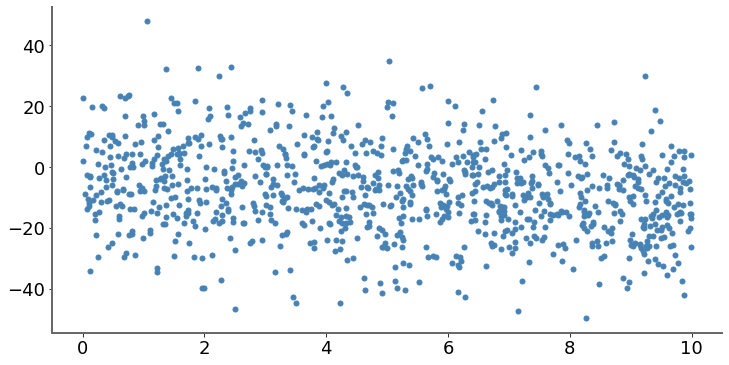

X                :      mean=   5.001  std=   2.889    min=   0.000    max=  10.000
Y                :      mean=  -7.985  std=  14.300    min= -73.530    max=  69.202


In [3]:
X,Y = cooker.get_dataset(1000000)

cooker.plot_dataset(X,Y)

## Step 3 : Data normalization

In [4]:
X_norm     = ( X - X.mean() ) / X.std()
Y_norm     = ( Y - Y.mean() ) / Y.std()

cooker.vector_infos('X origine',X)
cooker.vector_infos('X normalized',X_norm)

X origine        :      mean=   5.001  std=   2.889    min=   0.000    max=  10.000
X normalized     :      mean=   0.000  std=   1.000    min=  -1.731    max=   1.730


## Step 4 - Basic descent

### Basic gradient descent :

**With :**  

with :
    epochs = 200
    eta    = 0.01


**epochs :**  

    #i   Loss       Gradient         Theta
    0  +22.008   -9.167  +0.402   -4.492  -0.004
   20  +10.341   -6.120  +0.269   -2.999  -0.070
   40   +5.141   -4.086  +0.179   -2.002  -0.113
   60   +2.823   -2.728  +0.120   -1.337  -0.143
   80   +1.790   -1.821  +0.080   -0.892  -0.162
  100   +1.330   -1.216  +0.053   -0.596  -0.175
  120   +1.125   -0.812  +0.036   -0.398  -0.184
  140   +1.033   -0.542  +0.024   -0.266  -0.190
  160   +0.992   -0.362  +0.016   -0.177  -0.193
  180   +0.974   -0.241  +0.011   -0.118  -0.196
  200   +0.966   -0.161  +0.007   -0.079  -0.198


**Visualization :**  

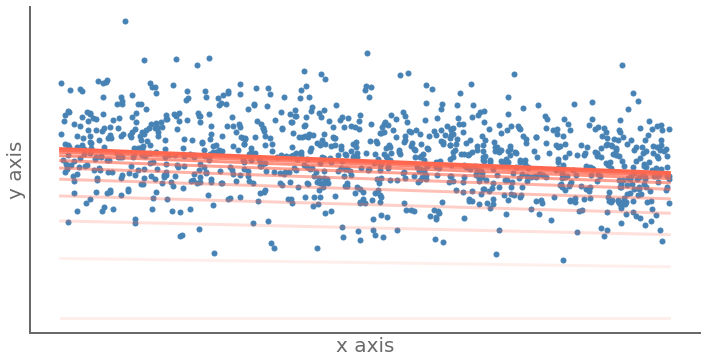

**Loss :**  

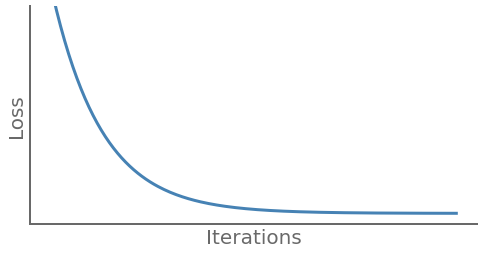

In [5]:
theta = cooker.basic_descent(X_norm, Y_norm, epochs=200, eta=0.01)

## Step 5 - Minibatch descent

### Mini batch gradient descent :

**With :**  

with :
    epochs     = 10
    batchs     = 20
    batch size = 10
    eta        = 0.01


**epochs :**  

    #i   Loss       Gradient         Theta
    0   +0.877  -11.545  -5.624   -0.005  -0.166
    1   +0.640  -12.133  -9.952   -0.076  -0.082
    2   +0.410   +0.987  -2.082   -0.095  -0.157
    3   +1.002   -1.358  -0.831   +0.046  -0.143
    4   +1.013   +5.783  +2.135   -0.004  -0.202
    5   +1.120   +1.943  -4.618   -0.007  -0.224
    6   +1.641  -14.414  +6.571   +0.010  -0.254
    7   +0.644   -0.503  -0.960   +0.006  -0.264
    8   +1.159   -2.750  -9.709   +0.001  -0.217
    9   +0.821  +13.720  +5.236   -0.012  -0.226


**Visualization :**  

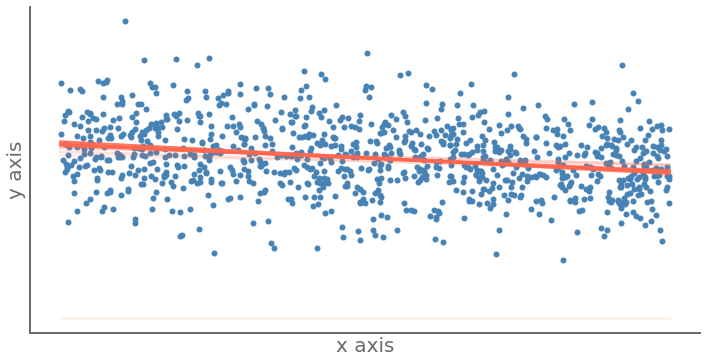

**Loss :**  

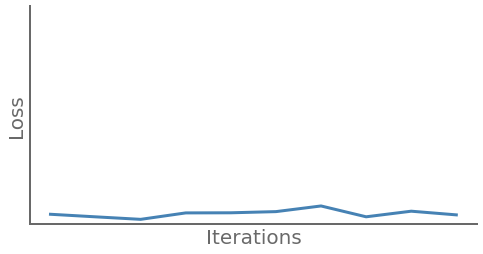

In [6]:
theta = cooker.minibatch_descent(X_norm, Y_norm, epochs=10, batchs=20, batch_size=10, eta=0.01)

In [7]:
pwk.end()

End time is : Tuesday 15 December 2020, 15:05:14
Duration is : 00:00:03 120ms
This notebook ends here


---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>